# Cluster Qinj Mapping, Ext VRef = 1 V

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import hist
from hist import Hist

In [23]:
def deliver_acc_stats(file_list):
    h = [[(
        Hist.new.Integer(125, 165, name="CAL", label="CAL [LSB]")
        .Integer(45, 85, name="TOT", label="TOT [LSB]")
        .Integer(150, 275, name="TOA", label="TOA [LSB]")
        .Double()
      )
      for j in range(16)] 
     for i in range(16)]
    hit_counts = np.zeros((16,16))
    CAL_sum = np.zeros((16,16))
    CAL_sum_sq = np.zeros((16,16))
    TOA_sum = np.zeros((16,16))
    TOA_sum_sq = np.zeros((16,16))
    TOT_sum = np.zeros((16,16))
    TOT_sum_sq = np.zeros((16,16))
    current_bcid = -1
    previous_bcid = -1
    min_toa = np.inf
    max_toa = -1
    
    total_files = len(file_list)
    for file_index, file_name in enumerate(file_list):
        print(f"{file_index+1}/{total_files}")
        with open(file_name) as infile:
            for line in infile:
                text_list = line.split()
                if text_list[2]=="HEADER":
                    current_bcid = int(text_list[8])
                if text_list[2]=="TRAILER":
                    previous_bcid = current_bcid
                if((current_bcid-previous_bcid!=1054 if current_bcid>previous_bcid else current_bcid+3564-previous_bcid!=1054) or previous_bcid==-1): 
                    # print(current_bcid, previous_bcid)
                    continue # The diff is 2x24
                if text_list[2]!="DATA": continue
                col = int(text_list[6])
                row = int(text_list[8])
                TOA = int(text_list[10])
                TOT = int(text_list[12])
                CAL = int(text_list[14])
                # if (row!=3 or col!=3):
                #     print(previous_bcid, current_bcid, row, col, TOA, TOT, CAL)
                if(CAL>200 or CAL<100): continue
                hit_counts[row, col] += 1 
                CAL_sum[row, col] += CAL
                CAL_sum_sq[row, col] += CAL*CAL
                TOA_sum[row, col] += TOA
                TOA_sum_sq[row, col] += TOA*TOA
                TOT_sum[row, col] += TOT
                TOT_sum_sq[row, col] += TOT*TOT
                h[row][col].fill(CAL,TOT,TOA)
    
                if(TOA<min_toa): min_toa = TOA
                if(TOA>max_toa): max_toa = TOA
    print("Min TOA:",min_toa,". Max TOA:", max_toa)
    return hit_counts,CAL_sum,CAL_sum_sq,TOA_sum,TOA_sum_sq,TOT_sum,TOT_sum_sq,h

In [24]:
def compute_stats(returned_package):
    hit_counts,CAL_sum,CAL_sum_sq,TOA_sum,TOA_sum_sq,TOT_sum,TOT_sum_sq,h = returned_package
    CAL_mean = CAL_sum/hit_counts
    CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
    TOA_mean = TOA_sum/hit_counts
    TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
    TOT_mean = TOT_sum/hit_counts
    TOT_std = np.sqrt((TOT_sum_sq/hit_counts) - pow(TOT_mean, 2))
    return CAL_mean,CAL_std,TOA_mean,TOA_std,TOT_mean,TOT_std

## Single Pixel

In [25]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_0.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_4.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_5.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_7.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_6.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_12.dat
../ETROC-Data/2023-06-06_Array_Test_

In [26]:
returned_package = deliver_acc_stats(file_list)
center_CAL_mean,center_CAL_std,center_TOA_mean,center_TOA_std,center_TOT_mean,center_TOT_std = compute_stats(returned_package)
center_h = returned_package[-1]

1/14
2/14
3/14
4/14
5/14
6/14
7/14
8/14
9/14
10/14
11/14
12/14
13/14
14/14
Min TOA: 179 . Max TOA: 217


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:8: RuntimeWarning: invalid 

## Single Pixel Qinj + Cluster Readout

In [27]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_27.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_26.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_18.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_24.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_25.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_19.dat
../ETROC-Data/2023-06-06_Array_Test_Resu

In [28]:
returned_package = deliver_acc_stats(file_list)
single_CAL_mean,single_CAL_std,single_TOA_mean,single_TOA_std,single_TOT_mean,single_TOT_std = compute_stats(returned_package)
single_h = returned_package[-1]

1/29
2/29
3/29
4/29
5/29
6/29
7/29
8/29
9/29
10/29
11/29
12/29
13/29
14/29
15/29
16/29
17/29
18/29
19/29
20/29
21/29
22/29
23/29
24/29
25/29
26/29
27/29
28/29
29/29
Min TOA: 179 . Max TOA: 217


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:8: RuntimeWarning: invalid 

## Cluster Qinj

In [29]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_33.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_27.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_26.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_32.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_18.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_24.dat
../ETROC-Data/2023-06-

In [30]:
returned_package = deliver_acc_stats(file_list)
allequal_CAL_mean,allequal_CAL_std,allequal_TOA_mean,allequal_TOA_std,allequal_TOT_mean,allequal_TOT_std = compute_stats(returned_package)
allequal_h = returned_package[-1]

1/42
2/42
3/42
4/42
5/42
6/42
7/42
8/42
9/42
10/42
11/42
12/42
13/42
14/42
15/42
16/42
17/42
18/42
19/42
20/42
21/42
22/42
23/42
24/42
25/42
26/42
27/42
28/42
29/42
30/42
31/42
32/42
33/42
34/42
35/42
36/42
37/42
38/42
39/42
40/42
41/42
42/42
Min TOA: 172 . Max TOA: 218


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_41692/2611023540.py:8: RuntimeWarning: invalid 

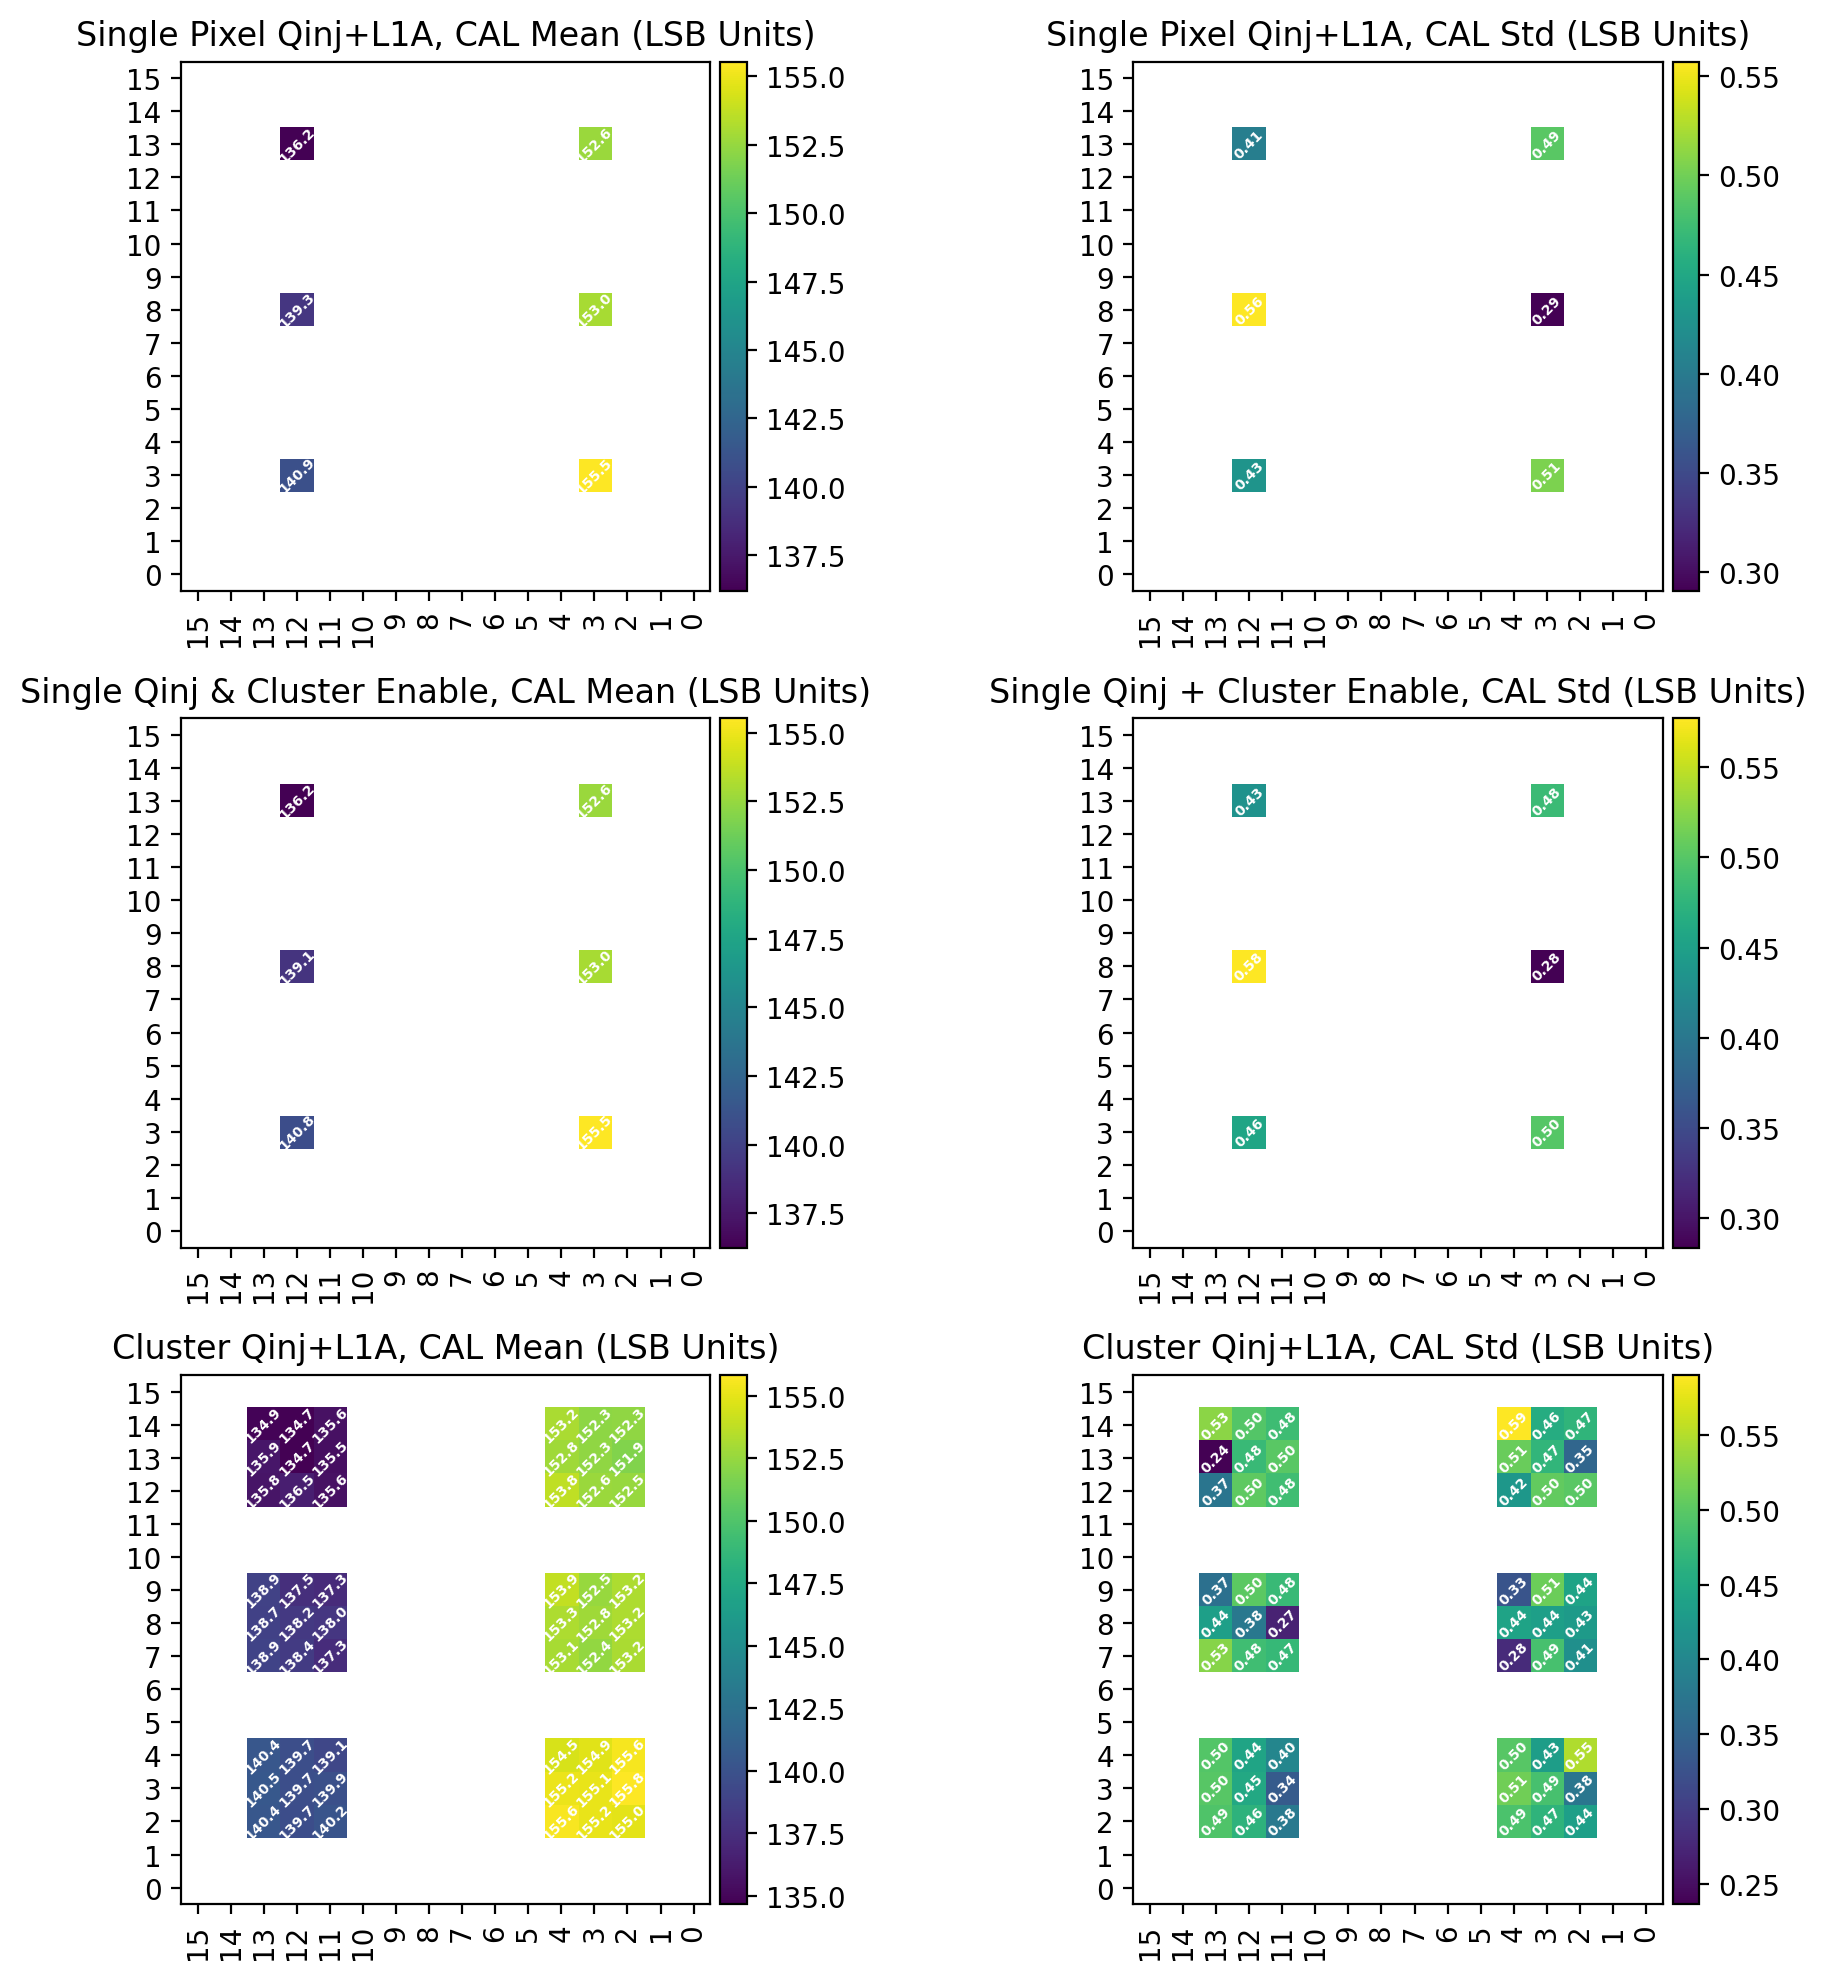

In [31]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("Single Pixel Qinj+L1A, CAL Mean (LSB Units)")
img0 = ax0.imshow(center_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("Single Pixel Qinj+L1A, CAL Std (LSB Units)")
img1 = ax1.imshow(center_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{center_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[1,0])
ax0.set_title("Single Qinj & Cluster Enable, CAL Mean (LSB Units)")
img0 = ax0.imshow(single_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[1,1])
ax1.set_title("Single Qinj + Cluster Enable, CAL Std (LSB Units)")
img1 = ax1.imshow(single_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(single_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{single_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(single_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{single_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[2,0])
ax0.set_title("Cluster Qinj+L1A, CAL Mean (LSB Units)")
img0 = ax0.imshow(allequal_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[2,1])
ax1.set_title("Cluster Qinj+L1A, CAL Std (LSB Units)")
img1 = ax1.imshow(allequal_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(allequal_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{allequal_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(allequal_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{allequal_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)


plt.tight_layout()
plt.savefig("figures/cluster_CAL_scan.pdf")
plt.show()

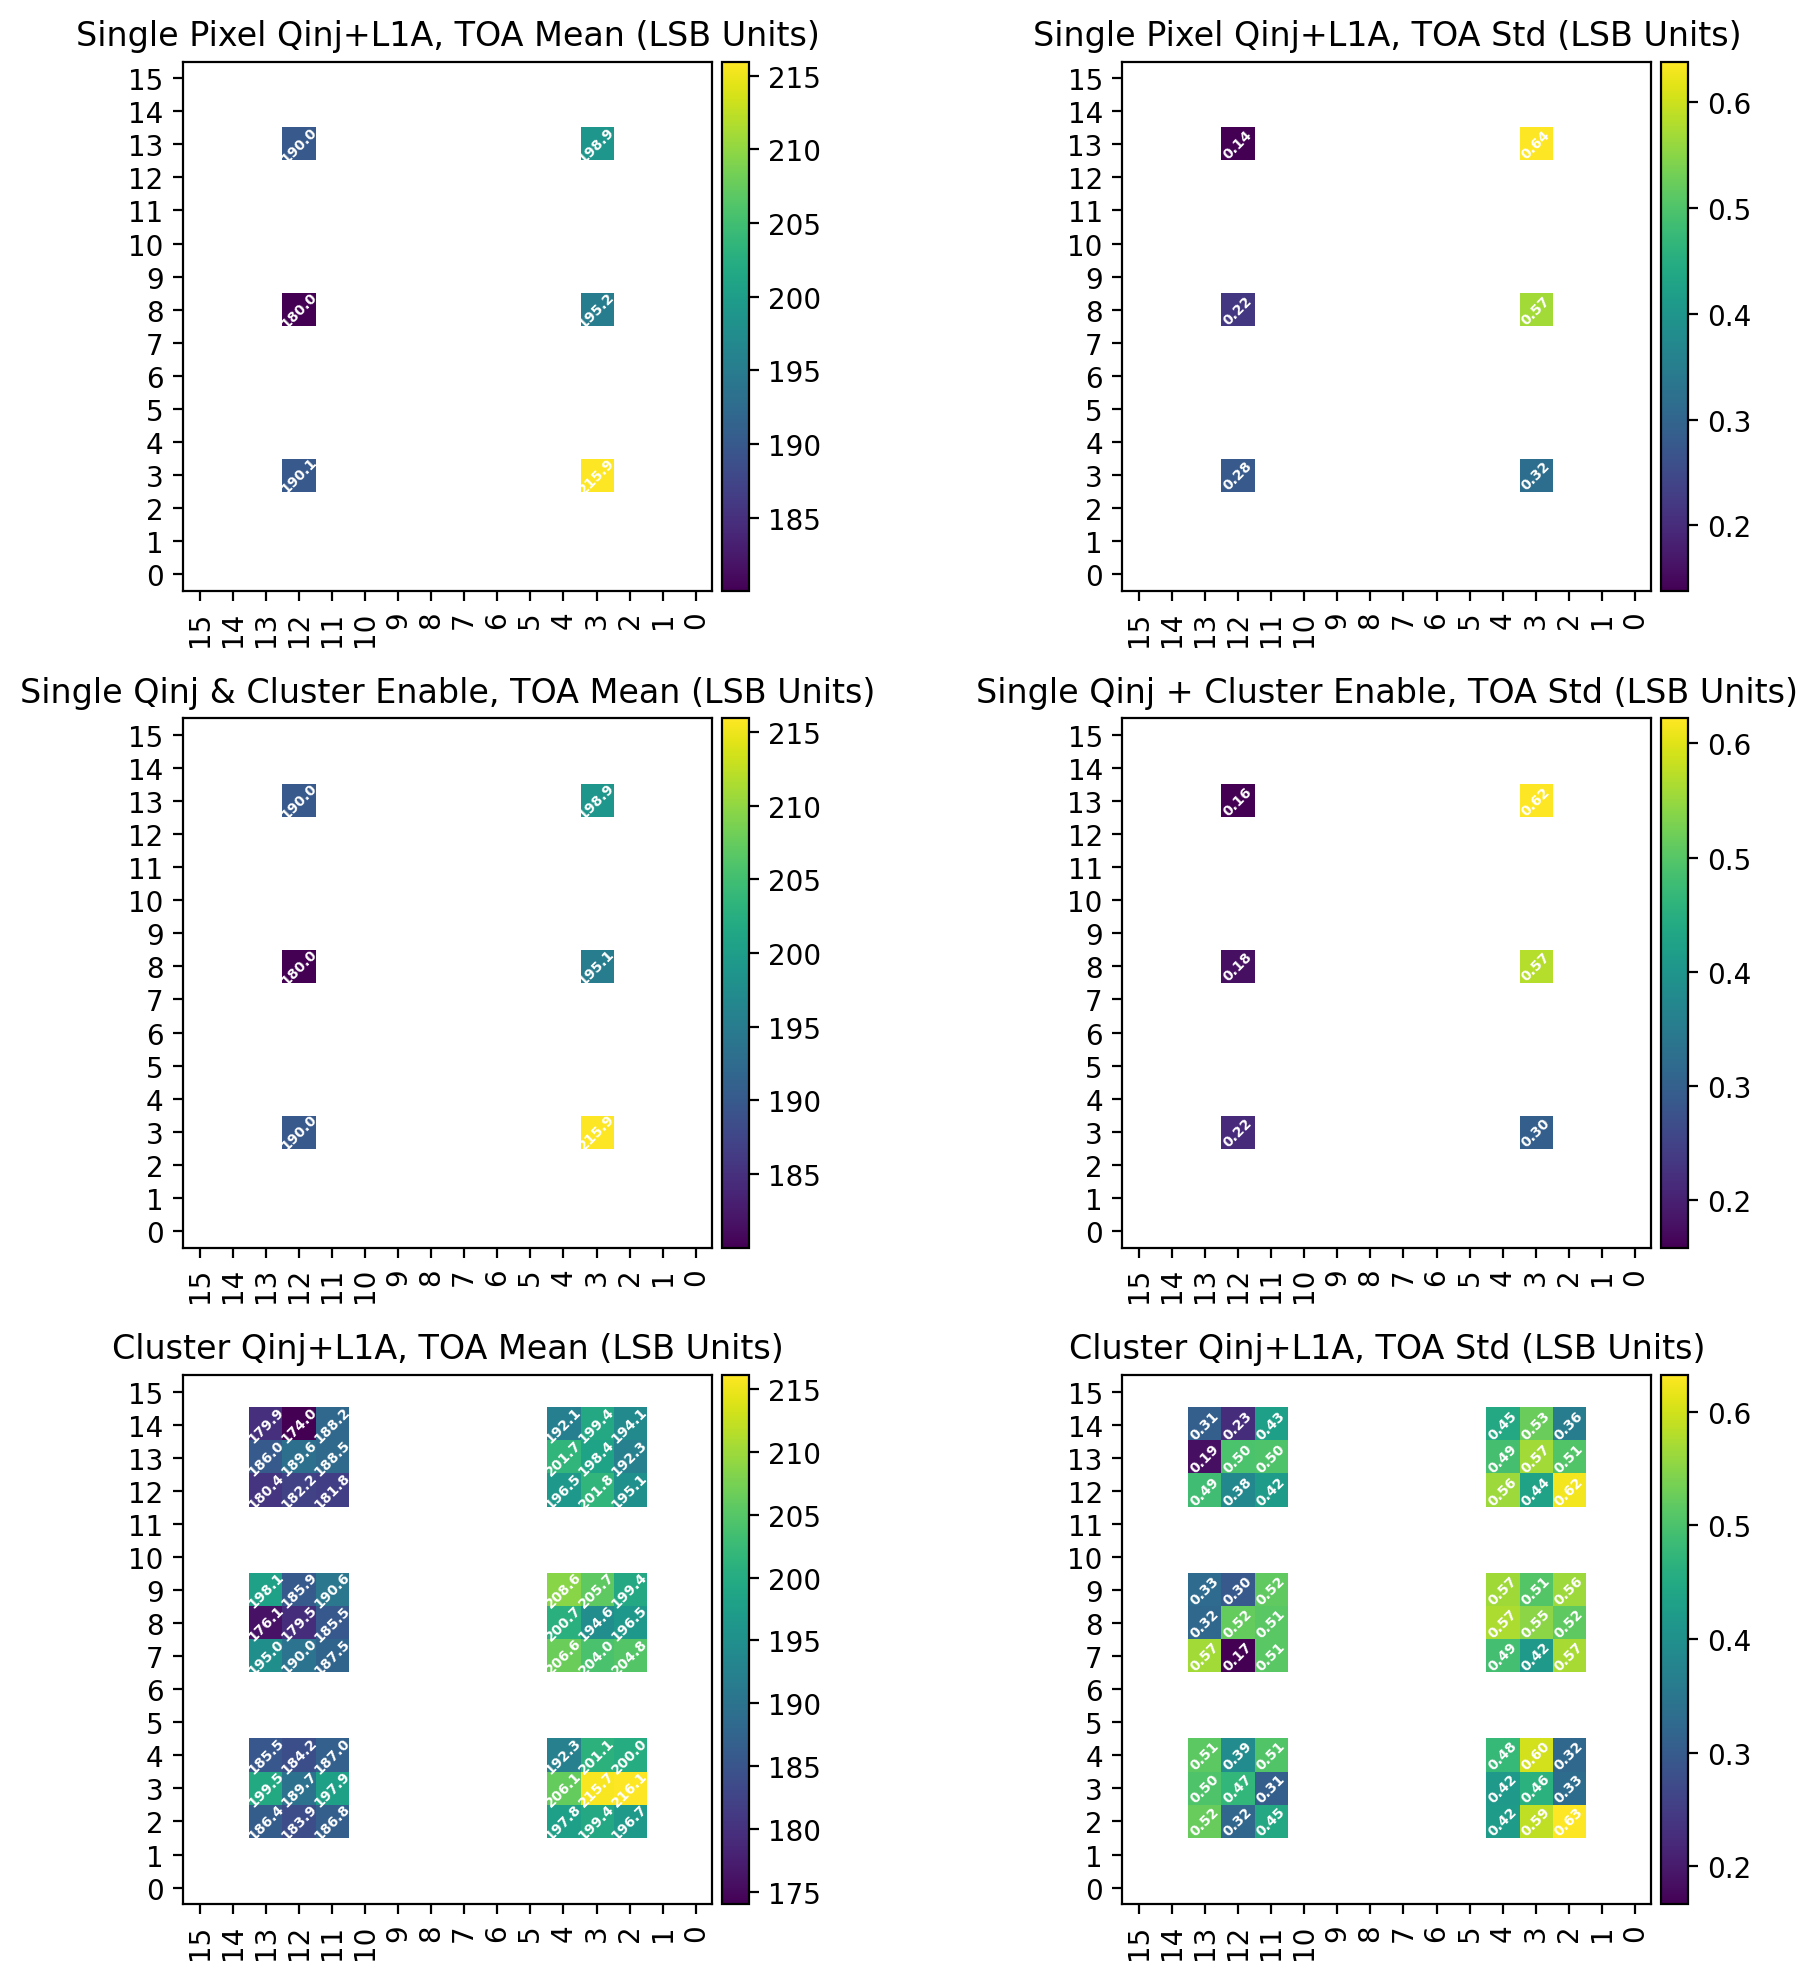

In [32]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("Single Pixel Qinj+L1A, TOA Mean (LSB Units)")
img0 = ax0.imshow(center_TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("Single Pixel Qinj+L1A, TOA Std (LSB Units)")
img1 = ax1.imshow(center_TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_TOA_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_TOA_std.T[x,y])): continue
        ax1.text(x, y, f"{center_TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[1,0])
ax0.set_title("Single Qinj & Cluster Enable, TOA Mean (LSB Units)")
img0 = ax0.imshow(single_TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[1,1])
ax1.set_title("Single Qinj + Cluster Enable, TOA Std (LSB Units)")
img1 = ax1.imshow(single_TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(single_TOA_mean.T[x,y])): continue
        ax0.text(x, y, f"{single_TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(single_TOA_std.T[x,y])): continue
        ax1.text(x, y, f"{single_TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[2,0])
ax0.set_title("Cluster Qinj+L1A, TOA Mean (LSB Units)")
img0 = ax0.imshow(allequal_TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[2,1])
ax1.set_title("Cluster Qinj+L1A, TOA Std (LSB Units)")
img1 = ax1.imshow(allequal_TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(allequal_TOA_mean.T[x,y])): continue
        ax0.text(x, y, f"{allequal_TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(allequal_TOA_std.T[x,y])): continue
        ax1.text(x, y, f"{allequal_TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)


plt.tight_layout()
plt.savefig("figures/cluster_TOA_scan.pdf")
plt.show()

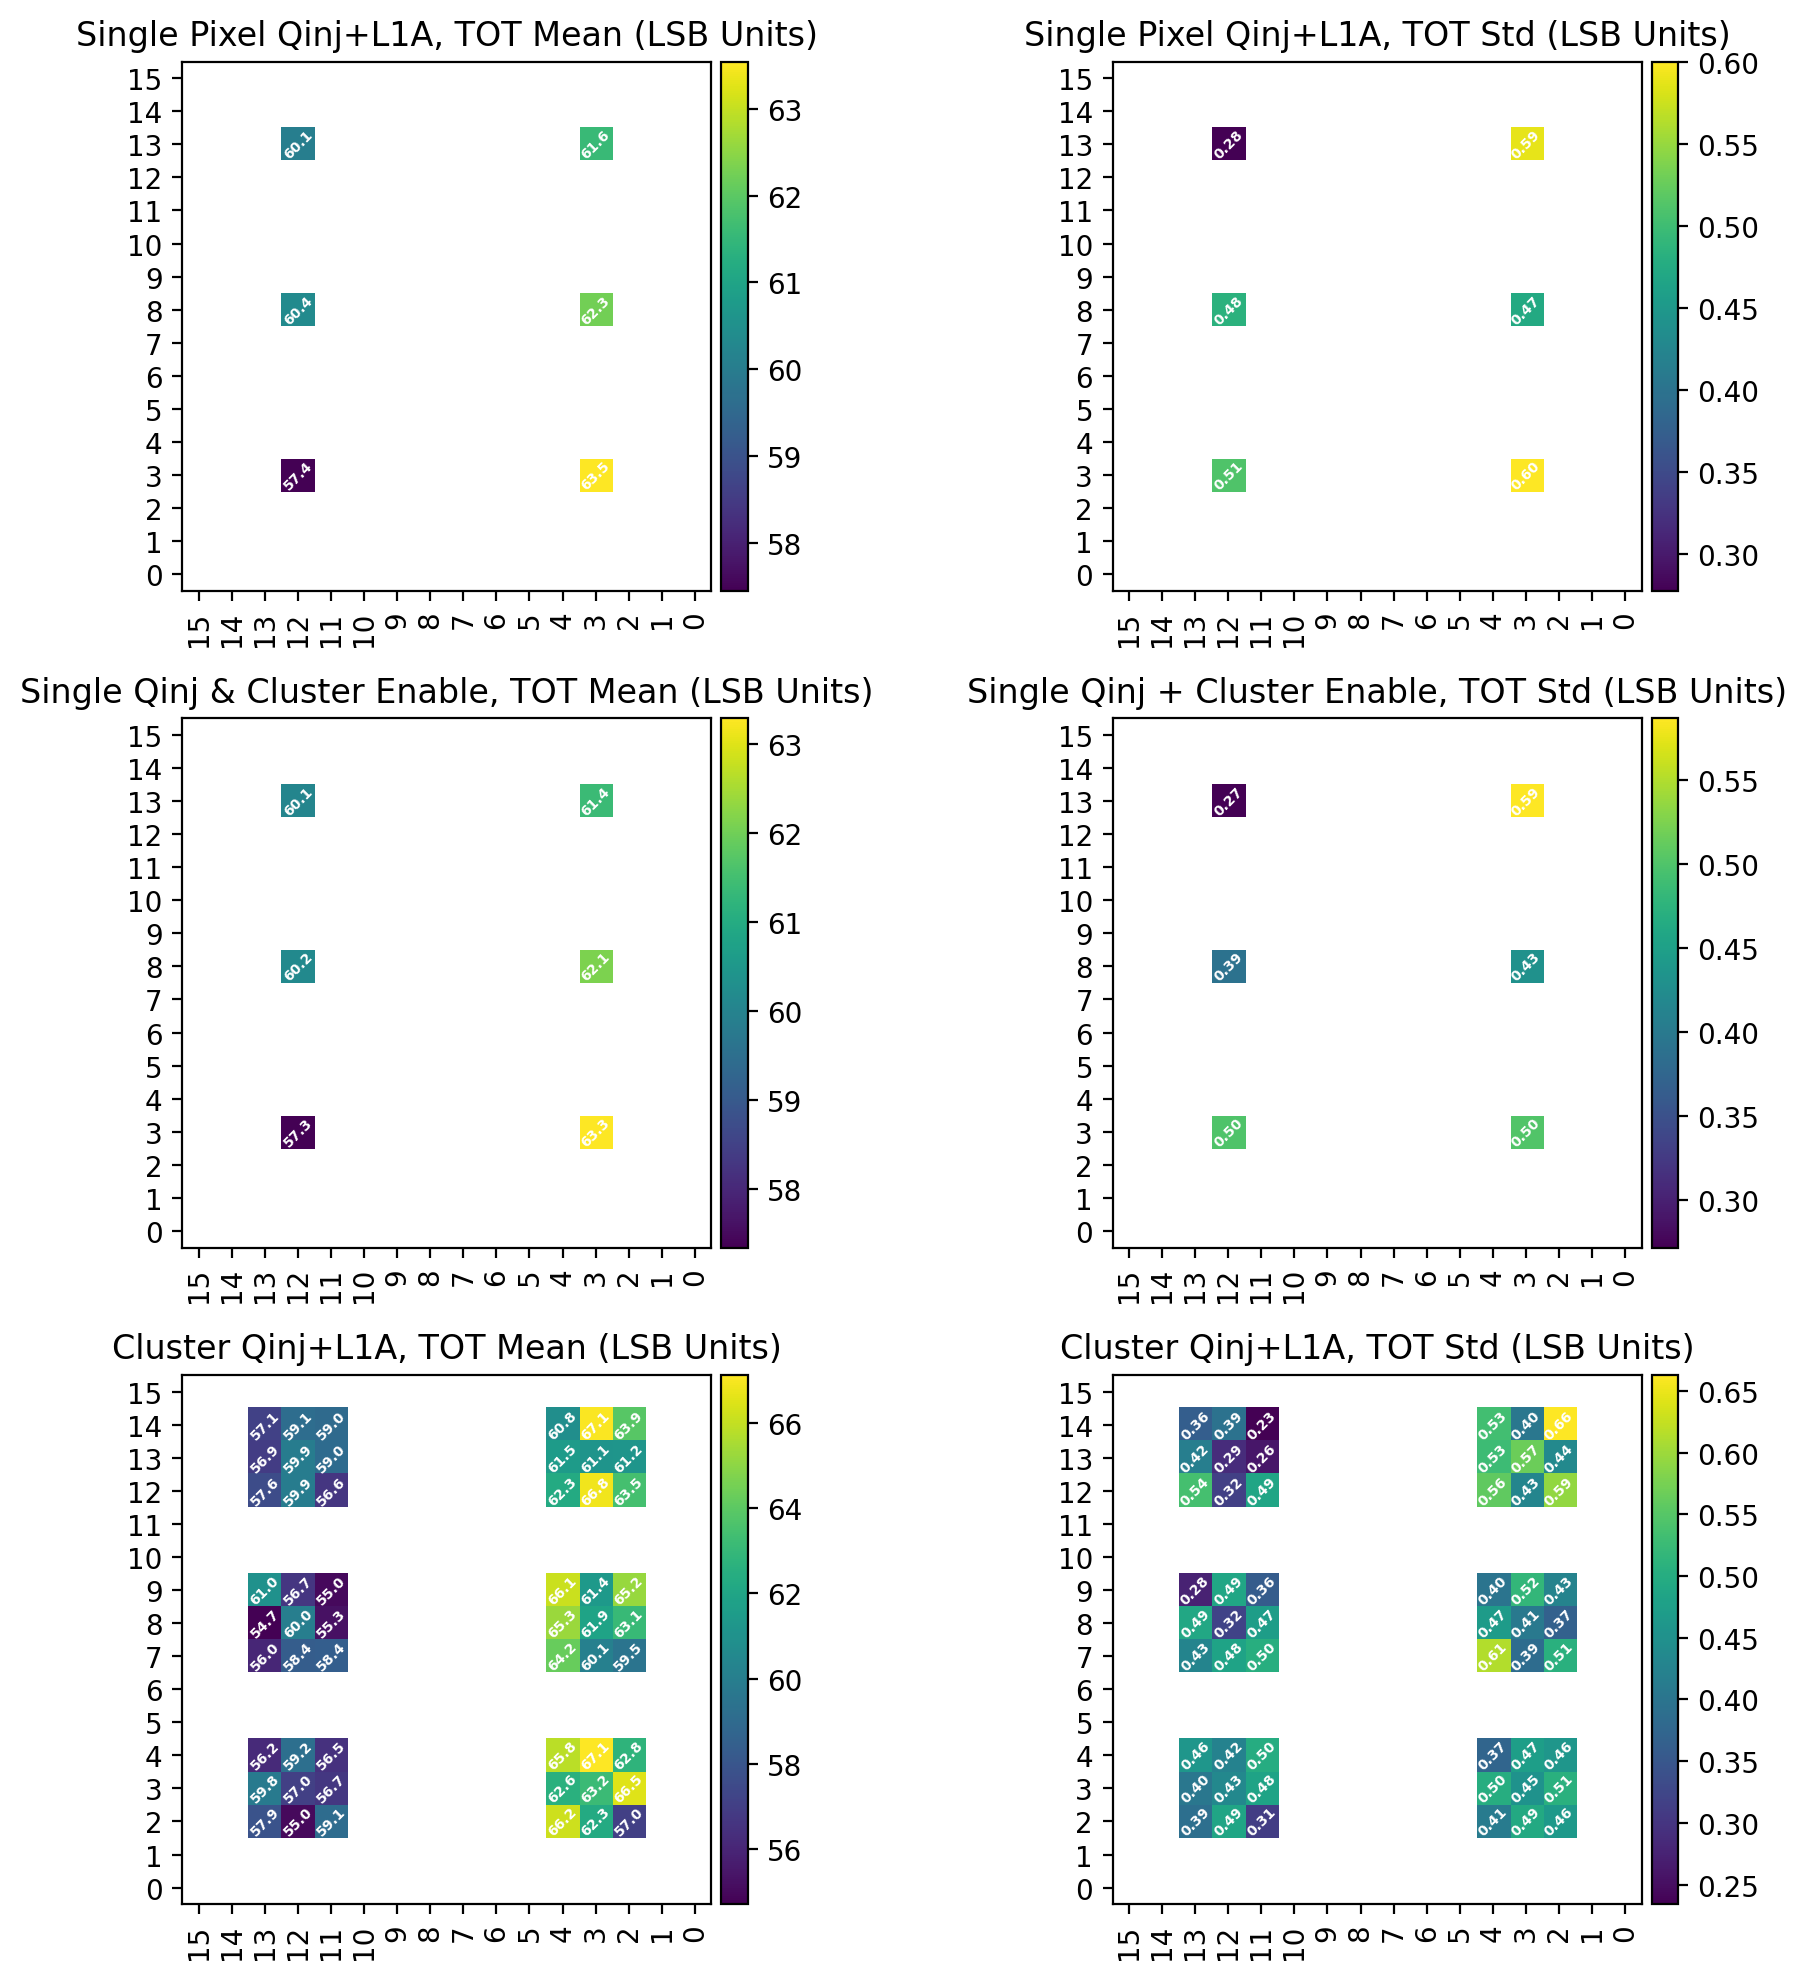

In [33]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("Single Pixel Qinj+L1A, TOT Mean (LSB Units)")
img0 = ax0.imshow(center_TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("Single Pixel Qinj+L1A, TOT Std (LSB Units)")
img1 = ax1.imshow(center_TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_TOT_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_TOT_std.T[x,y])): continue
        ax1.text(x, y, f"{center_TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[1,0])
ax0.set_title("Single Qinj & Cluster Enable, TOT Mean (LSB Units)")
img0 = ax0.imshow(single_TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[1,1])
ax1.set_title("Single Qinj + Cluster Enable, TOT Std (LSB Units)")
img1 = ax1.imshow(single_TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(single_TOT_mean.T[x,y])): continue
        ax0.text(x, y, f"{single_TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(single_TOT_std.T[x,y])): continue
        ax1.text(x, y, f"{single_TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[2,0])
ax0.set_title("Cluster Qinj+L1A, TOT Mean (LSB Units)")
img0 = ax0.imshow(allequal_TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[2,1])
ax1.set_title("Cluster Qinj+L1A, TOT Std (LSB Units)")
img1 = ax1.imshow(allequal_TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(allequal_TOT_mean.T[x,y])): continue
        ax0.text(x, y, f"{allequal_TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(allequal_TOT_std.T[x,y])): continue
        ax1.text(x, y, f"{allequal_TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)


plt.tight_layout()
plt.savefig("figures/cluster_TOT_scan.pdf")
plt.show()

## Overlay on one pixel

/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


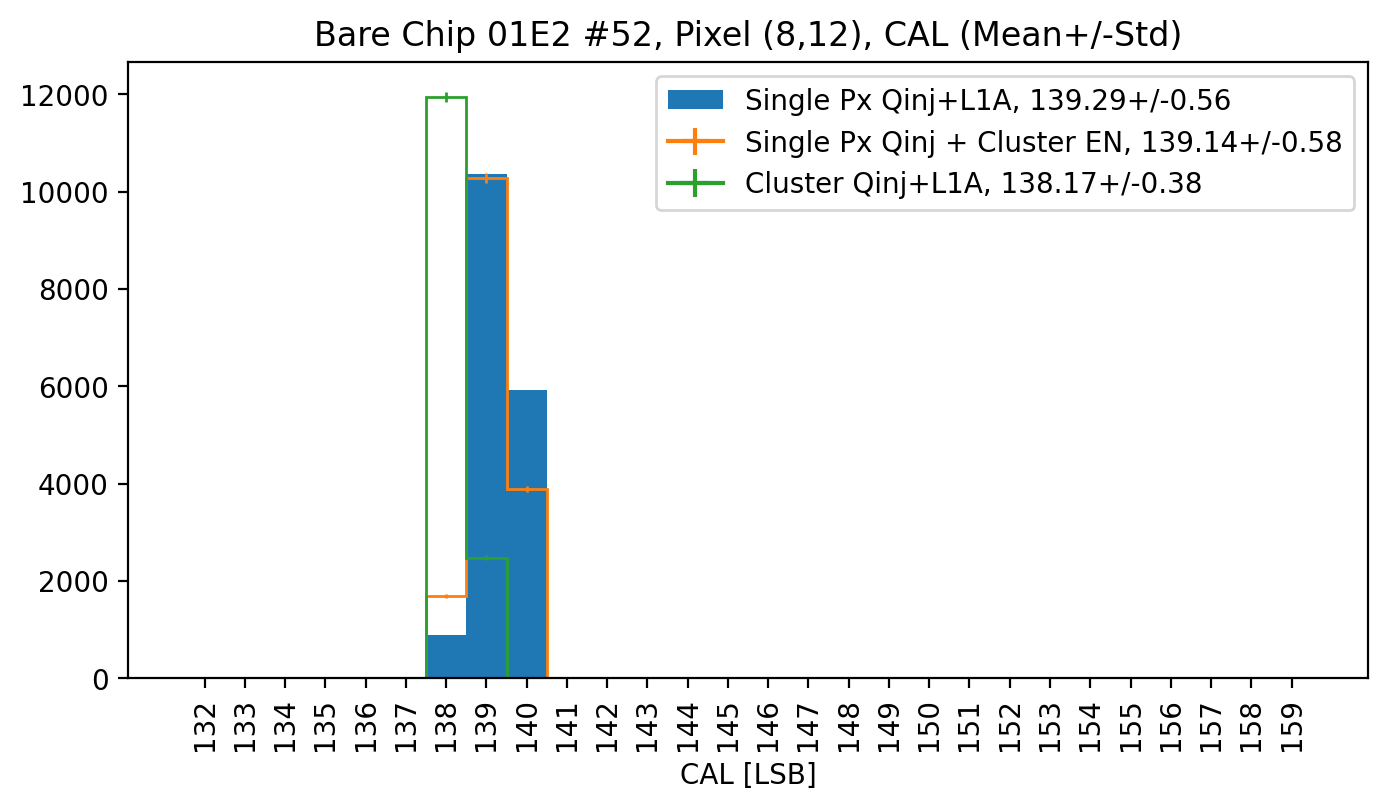

In [58]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Bare Chip 01E2 #52, Pixel ({8},{12}), CAL (Mean+/-Std)")
center_h[8][12].project("CAL")[132j:160j].plot1d(ax=ax, lw=1,histtype="fill", label=f"Single Px Qinj+L1A, {center_CAL_mean[8,12]:.2f}+/-{center_CAL_std[8,12]:.2f}")
single_h[8][12].project("CAL")[132j:160j].plot1d(ax=ax, lw=1, label=f"Single Px Qinj + Cluster EN, {single_CAL_mean[8,12]:.2f}+/-{single_CAL_std[8,12]:.2f}")
allequal_h[8][12].project("CAL")[132j:160j].plot1d(ax=ax, lw=1, label=f"Cluster Qinj+L1A, {allequal_CAL_mean[8,12]:.2f}+/-{allequal_CAL_std[8,12]:.2f}")
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.legend()
plt.savefig("figures/clusterCenters_CAL_8_12.pdf")
plt.show()

/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


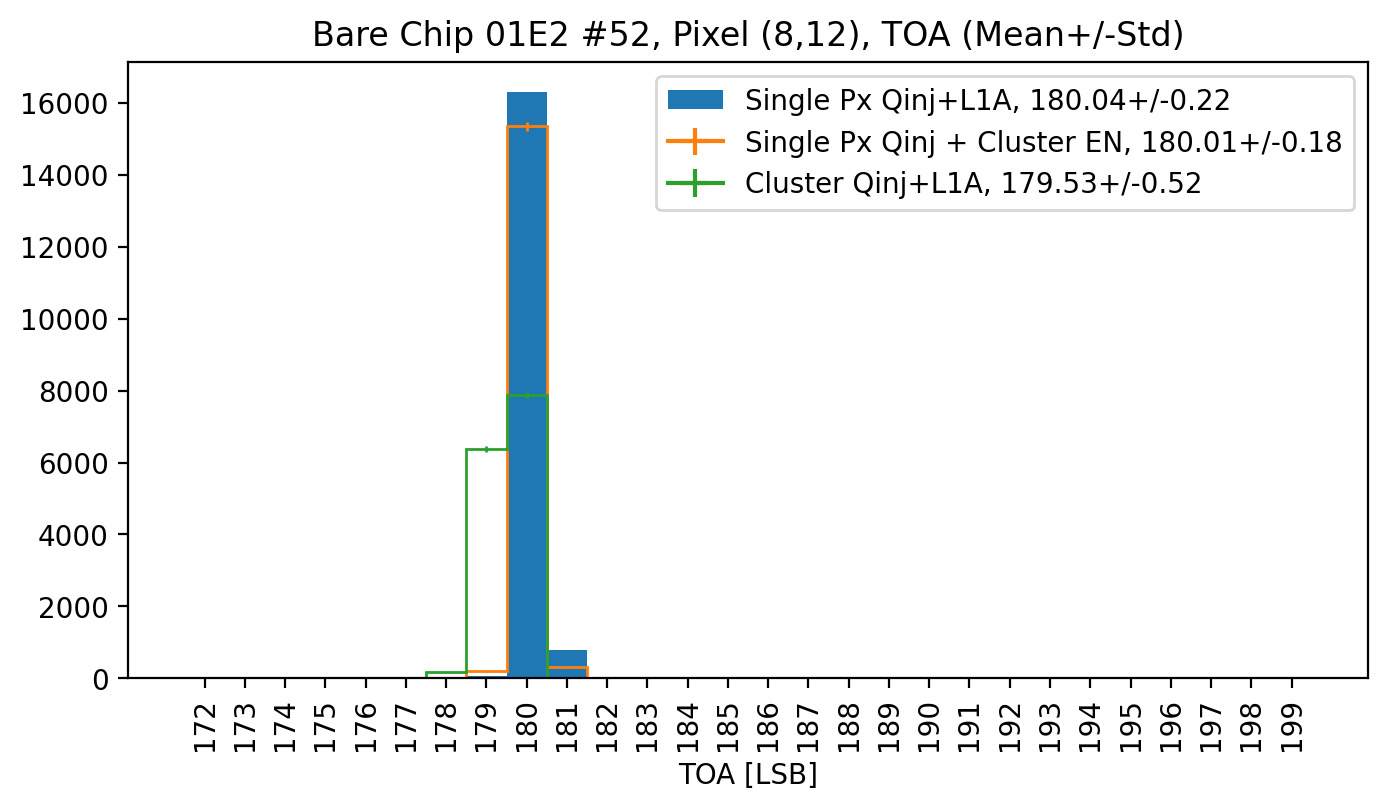

In [59]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Bare Chip 01E2 #52, Pixel ({8},{12}), TOA (Mean+/-Std)")
center_h[8][12].project("TOA")[172j:200j].plot1d(ax=ax, lw=1,histtype="fill", label=f"Single Px Qinj+L1A, {center_TOA_mean[8,12]:.2f}+/-{center_TOA_std[8,12]:.2f}")
single_h[8][12].project("TOA")[172j:200j].plot1d(ax=ax, lw=1, label=f"Single Px Qinj + Cluster EN, {single_TOA_mean[8,12]:.2f}+/-{single_TOA_std[8,12]:.2f}")
allequal_h[8][12].project("TOA")[172j:200j].plot1d(ax=ax, lw=1, label=f"Cluster Qinj+L1A, {allequal_TOA_mean[8,12]:.2f}+/-{allequal_TOA_std[8,12]:.2f}")
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.legend()
plt.savefig("figures/clusterCenters_TOA_8_12.pdf")
plt.show()

/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


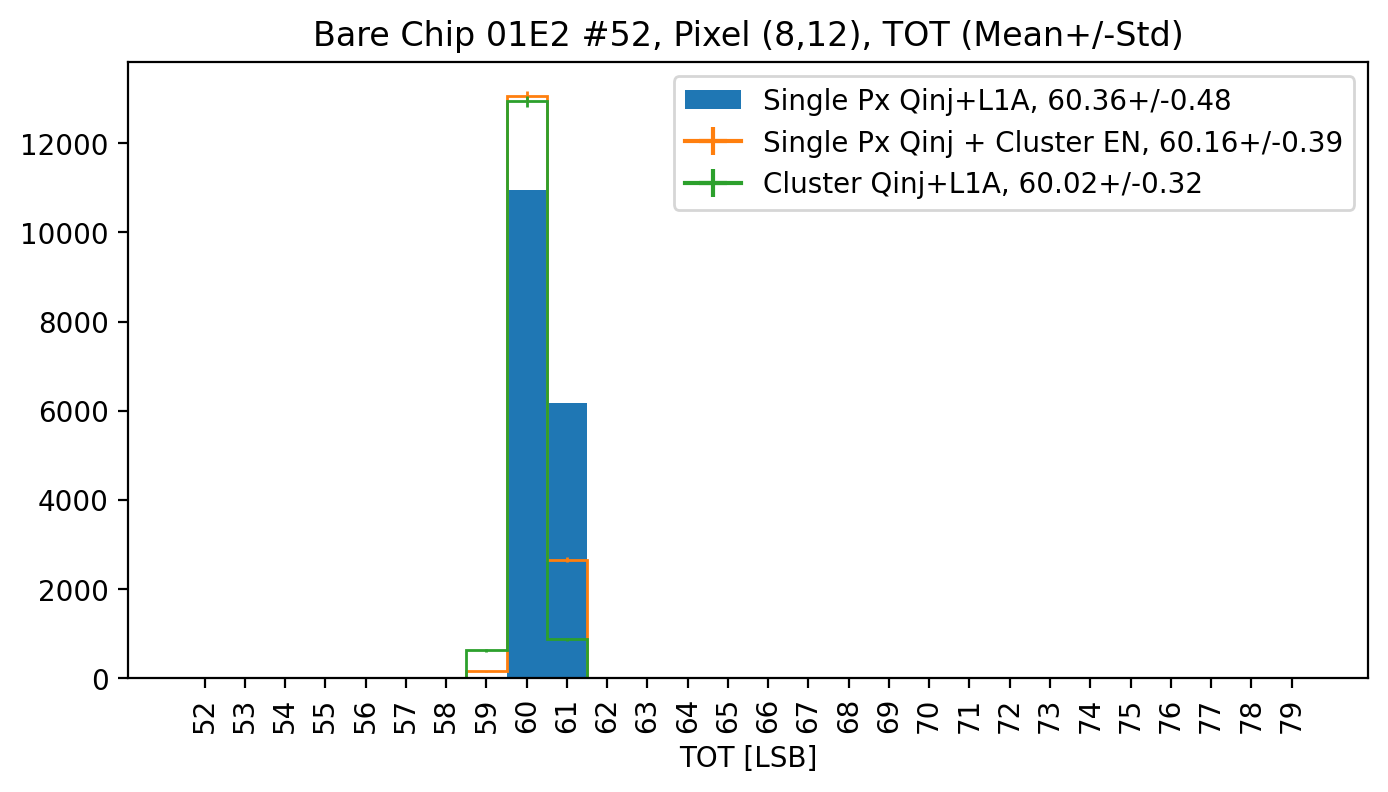

In [60]:
fig = plt.figure(dpi=200, figsize=(8,4))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Bare Chip 01E2 #52, Pixel ({8},{12}), TOT (Mean+/-Std)")
center_h[8][12].project("TOT")[52j:80j].plot1d(ax=ax, lw=1,histtype="fill", label=f"Single Px Qinj+L1A, {center_TOT_mean[8,12]:.2f}+/-{center_TOT_std[8,12]:.2f}")
single_h[8][12].project("TOT")[52j:80j].plot1d(ax=ax, lw=1, label=f"Single Px Qinj + Cluster EN, {single_TOT_mean[8,12]:.2f}+/-{single_TOT_std[8,12]:.2f}")
allequal_h[8][12].project("TOT")[52j:80j].plot1d(ax=ax, lw=1, label=f"Cluster Qinj+L1A, {allequal_TOT_mean[8,12]:.2f}+/-{allequal_TOT_std[8,12]:.2f}")
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.legend()
plt.savefig("figures/clusterCenters_TOT_8_12.pdf")
plt.show()